In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# Digit recognition when data is in 'pixel form'

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Shape of the pictures

X_test[4,:,:].shape

(28, 28)

In [5]:
df = pd.DataFrame(X_train[0,:,:])
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


(-0.5, 27.5, 27.5, -0.5)

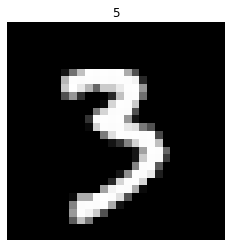

In [37]:
img = X_test[30,:,:]
plt.imshow(img, cmap = 'gray')
plt.title(y_train[0])
plt.axis('off')

In [7]:
from keras.utils import to_categorical

X_train_new = X_train[:10000,:,:]
y_train_new = y_train[:10000]
X_test_new = X_test[:2500,:,:]
y_test_new = y_test[:2500]

y_train_new = to_categorical(y_train_new, 10)
y_test_new = to_categorical(y_test_new, 10)

X_train_new = X_train_new.reshape(10000, 28, 28, 1)
X_test_new = X_test_new.reshape(2500, 28, 28, 1)

In [8]:
y_test_new.shape

(2500, 10)

In [9]:
# Convolutional Neural Network for identifying the digits

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train_new, y_train_new, epochs = 15, batch_size = 128, validation_data = (X_test_new, y_test_new), verbose = 1)

Train on 10000 samples, validate on 2500 samples
Epoch 1/15
10000/10000 [==============================] - 84s 8ms/step - loss: 4.7063 - accuracy: 0.5354 - val_loss: 0.5597 - val_accuracy: 0.8320
Epoch 2/15
10000/10000 [==============================] - 70s 7ms/step - loss: 0.6612 - accuracy: 0.7963 - val_loss: 0.3634 - val_accuracy: 0.8980
Epoch 3/15
10000/10000 [==============================] - 69s 7ms/step - loss: 0.4342 - accuracy: 0.8682 - val_loss: 0.2356 - val_accuracy: 0.9288
Epoch 4/15
10000/10000 [==============================] - 67s 7ms/step - loss: 0.3430 - accuracy: 0.8981 - val_loss: 0.2012 - val_accuracy: 0.9428
Epoch 5/15
10000/10000 [==============================] - 71s 7ms/step - loss: 0.2654 - accuracy: 0.9195 - val_loss: 0.1796 - val_accuracy: 0.9468
Epoch 6/15
10000/10000 [==============================] - 68s 7ms/step - loss: 0.2334 - accuracy: 0.9309 - val_loss: 0.1725 - val_accuracy: 0.9480
Epoch 7/15
10000/10000 [==============================] - 86s 9ms/ste

In [12]:
score = model.evaluate(X_test_new, y_test_new, verbose = 0)
print('Test loss: ', score[0])
print('Accuracy: ', score[1])

Test loss:  0.10451674363203346
Accuracy:  0.9692000150680542


Text(0, 0.5, 'Loss')

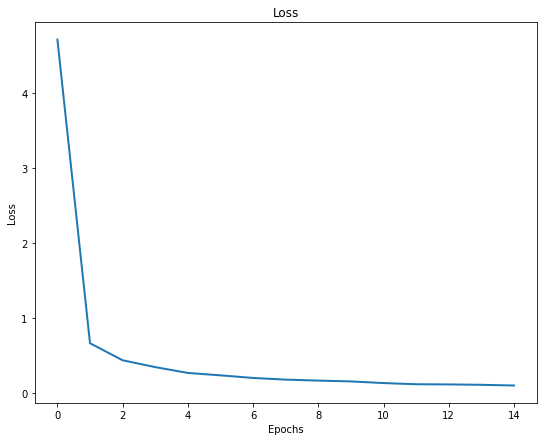

In [13]:
# Plotting the accuracy

accuracy = model.history.history
plt.figure(figsize = (9,7))
plt.plot(accuracy['loss'], lw = 2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict(X_test_new)
prediction_classes = np.argmax(prediction, axis = 1)
y_true = np.argmax(y_test_new, axis = 1)
cm = confusion_matrix(y_true, prediction_classes)

print(classification_report(y_true, prediction_classes))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       219
           1       0.98      0.99      0.98       287
           2       0.97      0.97      0.97       276
           3       0.96      0.97      0.96       254
           4       0.96      0.99      0.97       275
           5       0.97      0.97      0.97       221
           6       0.96      0.97      0.96       225
           7       0.96      0.97      0.97       257
           8       0.98      0.93      0.96       242
           9       0.99      0.95      0.97       244

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



Text(0.5, 1.0, 'Confusion Matrix')

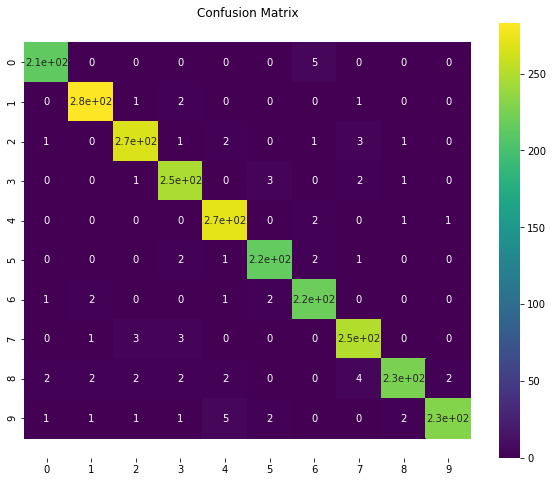

In [15]:
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, cmap = 'viridis')
#b, t = plt.ylim()
#plt.ylim(b + 0.5, t - 0.5)
plt.title('Confusion Matrix')

In [16]:
# New prediction

new_sample = X_test_new[11:12,:,:,:]
new_sample.shape

In [17]:
new_pred = model.predict(new_sample)

In [19]:
new_pred = new_pred.ravel()

In [20]:
np.argmax(new_pred, axis = 0)

6

In [21]:
# Saving model for reproduction

# model.save('conv_model.h5')

In [2]:
from keras.models import load_model

reconstructed_model = load_model('conv_model.h5')

# Let's check:
# np.testing.assert_allclose(model.predict(new_sample), reconstructed_model.predict(new_sample))

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
# reconstructed_model.fit(test_input, test_target)

Using TensorFlow backend.


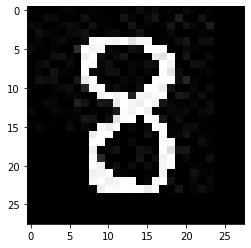

In [5]:
# Creating my own digit picture using Paint 
# Let's import them with the Pillow library

from PIL import Image
import matplotlib.image as mpimg

image = Image.open('numbers/number_eight.jpg')
image = image.resize((28, 28))
#image.save('numbers28/28X28number_eight.jpg')
image = mpimg.imread('numbers28/number00.jpg')
plt.imshow(image)

In [10]:
# Converting from RGB to grayscale and making prediction

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(image)
gray = gray.reshape(1, 28, 28, 1)
gray_pred = reconstructed_model.predict(gray)
print('Predicted value:', np.argmax(gray_pred))

Predicted value: 8


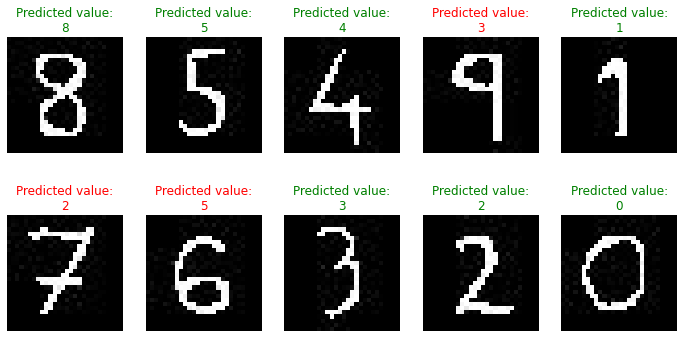

In [19]:
import matplotlib.image as  mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def image():
    files = [f for f in os.listdir('numbers/') if f.endswith('.jpg')]
    predictions = []
    for i in range(len(files)):
        image = Image.open('numbers/' + files[i])
        image = image.resize((28, 28)) 
        image.save('numbers28/number0' + str(i) + '.jpg')
        image = mpimg.imread('numbers28/number0' + str(i) + '.jpg')
        gray = rgb2gray(image)
        gray = gray.reshape(1, 28, 28, 1)
        gray_pred = reconstructed_model.predict(gray)
        predictions.append(gray_pred.argmax())
    return predictions, image
        
def plot_images(predictions, images):
    truth = [8, 5, 4, 9, 1, 7, 6, 3, 2, 0]
    plt.figure(figsize = (12, 6))
    for i in range(len(truth)):
        plt.subplot(2, 5, i+1)
        plt.axis('off')
        image = mpimg.imread('numbers28/number0' + str(i) +  '.jpg')
        color = 'green' if truth[i] == predictions[i] else 'red'
        plt.imshow(image)
        plt.title('Predicted value:\n' + str(predictions[i]), size = 12, color = color)
        plt.subplots_adjust(wspace = 0.2)
    return plt.show()

predictions, images = image()
plot_images(predictions, images)